In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import Counter

from matplotlib import style
style.use("ggplot")
%matplotlib inline

[[[255 242   0 255]
  [255 242   0 255]
  [ 63  72 204 255]
  [ 63  72 204 255]
  [ 63  72 204 255]
  [ 63  72 204 255]
  [255 242   0 255]
  [255 242   0 255]]

 [[255 242   0 255]
  [ 63  72 204 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [ 63  72 204 255]
  [255 242   0 255]]

 [[ 63  72 204 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [ 63  72 204 255]]

 [[ 63  72 204 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [ 63  72 204 255]]

 [[ 63  72 204 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [ 63  72 204 255]]

 [[ 63  72 204 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [ 63  72 204 255]]

 [[255 242   0 255]
  [ 63  

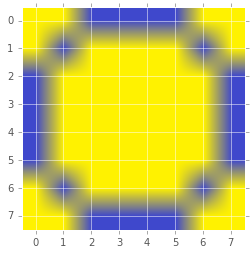

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

i = Image.open('images/numbers/y0.4.png')

iar = np.asarray(i)


plt.imshow(iar)
print(iar)
plt.show()	  
	  

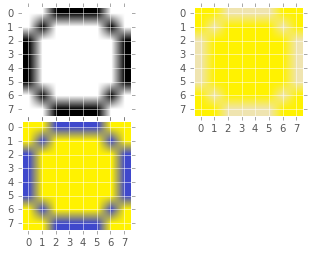

In [6]:
i = Image.open('images/numbers/0.1.png')
iar = np.array(i)
i2 = Image.open('images/numbers/y0.4.png')
iar2 = np.array(i2)
i3 = Image.open('images/numbers/y0.5.png')
iar3 = np.array(i3)


fig = plt.figure()
ax1 = plt.subplot2grid((8,6),(0,0), rowspan=4, colspan=3)
ax2 = plt.subplot2grid((8,6),(4,0), rowspan=4, colspan=3)
ax3 = plt.subplot2grid((8,6),(0,3), rowspan=4, colspan=3)

ax1.imshow(iar)
ax2.imshow(iar2)
ax3.imshow(iar3)

plt.show()

In [24]:
def createExamples():
    numberArrayExamples = open('numArEx.txt','a')
    numbersWeHave = range(1,10)
    for eachNum in numbersWeHave:
        for furtherNum in numbersWeHave:

            imgFilePath = 'images/numbers/'+str(eachNum)+'.'+str(furtherNum)+'.png'
            ei = Image.open(imgFilePath)
            eiar = np.array(ei)
            eiarl = str(eiar.tolist())

            lineToWrite = str(eachNum)+'::'+eiarl+'\n'
            numberArrayExamples.write(lineToWrite)

    
def threshold(imageArray):
    balanceAr = []
    newAr = imageArray
    for eachPart in imageArray:
        for theParts in eachPart:
            avgNum = reduce(lambda x, y: x + y, theParts[:3]) / len(theParts[:3])
            balanceAr.append(avgNum)
    balance = reduce(lambda x, y: x + y, balanceAr) / len(balanceAr)
    for eachRow in newAr:
        for eachPix in eachRow:
            if reduce(lambda x, y: x + y, eachPix[:3]) / len(eachPix[:3]) > balance:
                eachPix[0] = 255
                eachPix[1] = 255
                eachPix[2] = 255
                eachPix[3] = 255
            else:
                eachPix[0] = 0
                eachPix[1] = 0
                eachPix[2] = 0
                eachPix[3] = 255
    return newAr



def whatNumIsThis(filePath):

    matchedAr = []
    loadExamps = open('numArEx.txt','r').read()
    loadExamps = loadExamps.split('\n')
    i = Image.open(filePath)
    iar = np.array(i)
    iarl = iar.tolist()
    inQuestion = str(iarl)
    for eachExample in loadExamps:
        try:
            splitEx = eachExample.split('::')
            currentNum = splitEx[0]
            currentAr = splitEx[1]
            eachPixEx = currentAr.split('],')
            eachPixInQ = inQuestion.split('],')
            x = 0
            while x < len(eachPixEx):
                if eachPixEx[x] == eachPixInQ[x]:
                    matchedAr.append(int(currentNum))

                x+=1
        except Exception as e:
            print(str(e))
                
    x = Counter(matchedAr)
    print(x)
    graphX = []
    graphY = []

    ylimi = 0

    for eachThing in x:
        graphX.append(eachThing)
        graphY.append(x[eachThing])
        ylimi = x[eachThing]



    fig = plt.figure()
    ax1 = plt.subplot2grid((4,4),(0,0), rowspan=1, colspan=4)
    ax2 = plt.subplot2grid((4,4),(1,0), rowspan=3,colspan=4)
    
    ax1.imshow(iar)
    ax2.bar(graphX,graphY,align='center')
    plt.ylim(400)
    
    xloc = plt.MaxNLocator(12)
    ax2.xaxis.set_major_locator(xloc)

    plt.show()

In [28]:
createExamples()

list index out of range
Counter({2: 1377, 3: 1155, 6: 1116, 5: 1101, 9: 1062, 8: 1047, 1: 1005, 4: 969, 7: 960})


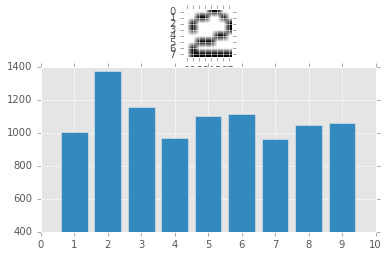

In [31]:
whatNumIsThis('images/numbers/2.8.png') # its 2!